<a href="https://colab.research.google.com/github/Betsy194/Deep-Learning/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from keras.datasets import mnist
from keras import datasets, layers, models

from tensorflow.keras.models import Sequential
import keras.utils as np_utils


from tensorflow.keras.layers import Dense, Dropout, Activation

### Load Mnist Dataset already in Keras

In [3]:
!pip install keras

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
X_train.shape


(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

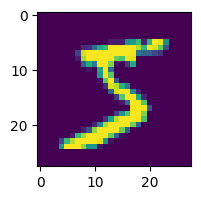

In [14]:
plt.figure(figsize = (10, 2))
plt.imshow(X_train[0])

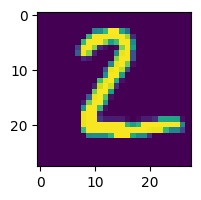

In [15]:
plt.figure(figsize = (10, 2))
plt.imshow(X_test[1])

### Flatten layer

In [16]:
# Reshape 28 x 28 matrices to 784 vectors

X_train = X_train.reshape(60000, 784)

X_test = X_test.reshape(10000, 784)

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Normalization

In [18]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [19]:
X_train_scaled.shape

(60000, 784)

In [20]:
X_test_scaled.shape

(10000, 784)

In [21]:
classes = 10

y_train = np_utils.to_categorical(y_train, classes)

y_test = np_utils.to_categorical(y_test, classes)

### Build our layered network

In [27]:
model = keras.Sequential([
    #first activation layer
    keras.layers.Dense(512, input_shape = (784,), activation = 'relu'),
    keras.layers.Dropout(0.2),

    #second activation layer
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.2),

    #third activation layer
    keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(X_train, y_train, epochs=5, batch_size = 128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8002 - loss: 10.0392
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9123 - loss: 0.6183
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9364 - loss: 0.3174
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9493 - loss: 0.2105
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9561 - loss: 0.1719


In [29]:
score = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9532 - loss: 0.1700


In [30]:
score[1]

0.9609000086784363

In [31]:
pred = model.predict(X_test)
pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[3.3495351e-20, 9.0690636e-21, 2.2959390e-12, ..., 9.9999994e-01,
        1.6363109e-20, 8.4983012e-14],
       [1.0855131e-17, 1.6605082e-11, 9.9999970e-01, ..., 3.3299230e-15,
        2.6439103e-08, 1.3168681e-16],
       [8.5485845e-14, 9.9999994e-01, 7.1572774e-12, ..., 1.4612478e-09,
        1.3742288e-10, 4.6849460e-13],
       ...,
       [5.6374799e-18, 4.4169028e-16, 5.6524303e-16, ..., 3.3436837e-15,
        2.3281082e-12, 2.0341767e-10],
       [1.0644129e-23, 3.1646508e-29, 3.7907389e-31, ..., 1.5906748e-20,
        9.2689725e-16, 5.1737238e-15],
       [1.0079466e-08, 6.5766831e-13, 7.5365556e-12, ..., 3.4848225e-22,
        7.7327156e-14, 5.1799673e-14]], dtype=float32)

In [32]:
y_correct = np.nonzero(pred== y_test)[0]

y_incorrect = np.nonzero(pred != y_test)[0]

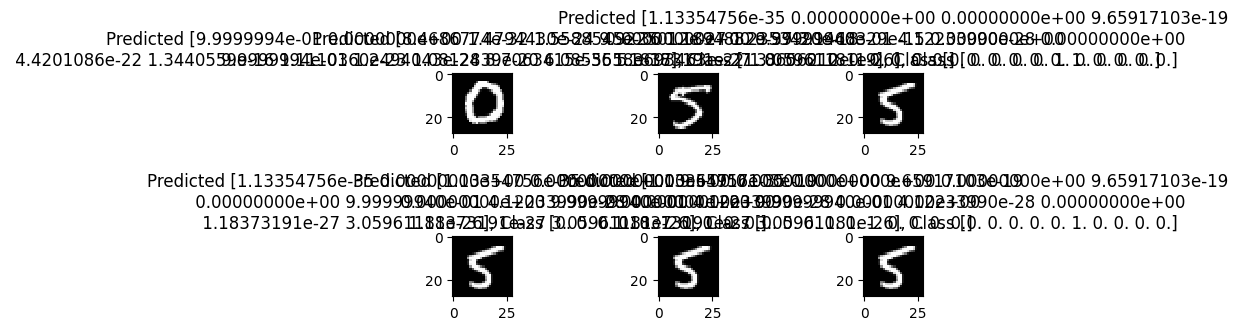

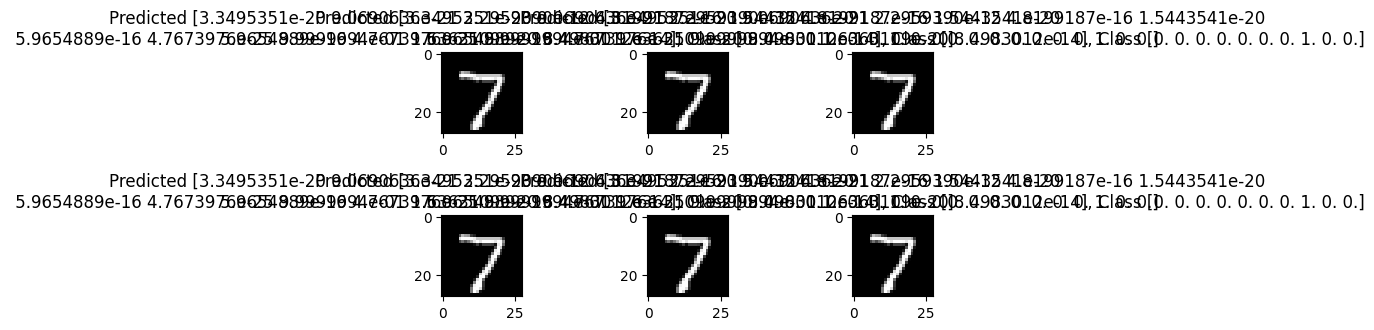

In [33]:
plt.figure()
for i, correct in enumerate(y_correct[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(y_incorrect[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred[incorrect], y_test[incorrect]))

plt.tight_layout()

In [34]:
models = model

In [35]:
models.save('models.h5')

## Convolutional Neural Networks

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers import BatchNormalization

In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [38]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [39]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [40]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [41]:
classes = 10

y_train = np_utils.to_categorical(y_train, classes)

y_test = np_utils.to_categorical(y_test, classes)

In [42]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= (28,28,1)))
model.add(BatchNormalization(axis=1))
convLayer01 = Activation('relu')
model.add(convLayer01)

model.add(Conv2D(32, (3,3), input_shape= (28,28,1)))
model.add(BatchNormalization(axis=1))
model.add(Activation('relu'))
convLayer02 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer02)

model.add(Conv2D(64, (3,3), input_shape= (28,28,1)))
model.add(BatchNormalization(axis=1))
convLayer03 = Activation('relu')
model.add(convLayer03)

model.add(Conv2D(64, (3,3), input_shape= (28,28,1)))
model.add(BatchNormalization(axis=1))
model.add(Activation('relu'))
convLayer04 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer04)
model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             104 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 32)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 10, 64)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 64)            │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │              

 Total params: 597,242 (2.28 MB)

 Trainable params: 596,082 (2.27 MB)

 Non-trainable params: 1,160 (4.53 KB)

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 163s 338ms/step - accuracy: 0.3236 - loss: nan
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 158s 338ms/step - accuracy: 0.0971 - loss: nan
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 341ms/step - accuracy: 0.0984 - loss: nan
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 158s 336ms/step - accuracy: 0.0991 - loss: nan
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 335ms/step - accuracy: 0.0994 - loss: nan


### Data Augmentation to reduce overfitting

In [46]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [47]:
train_generator = gen.flow(X_train, y_train, batch_size=128)
test_generator = test_gen.flow(X_test, y_test, batch_size=128)

In [48]:
model.fit(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1,
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 190s 400ms/step - accuracy: 0.0977 - loss: nan - val_accuracy: 0.0981 - val_loss: nan
Epoch 2/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 141us/step - accuracy: 0.1172 - loss: nan - val_accuracy: 0.0625 - val_loss: nan
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


468/468 ━━━━━━━━━━━━━━━━━━━━ 195s 386ms/step - accuracy: 0.0995 - loss: nan - val_accuracy: 0.0981 - val_loss: nan
Epoch 4/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0938 - loss: nan - val_accuracy: 0.0625 - val_loss: nan
Epoch 5/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 181s 386ms/step - accuracy: 0.0998 - loss: nan - val_accuracy: 0.0980 - val_loss: nan


In [49]:
score = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.0924 - loss: nan


In [ ]:
model.save('model.h5')

In [ ]:
model.save('model.keras')

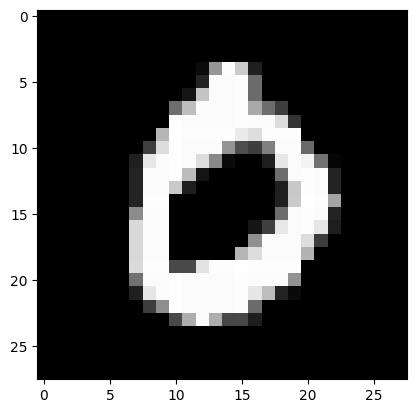

In [50]:
plt.figure()
plt.imshow(X_test[3].reshape(28,28), cmap='gray', interpolation='none')

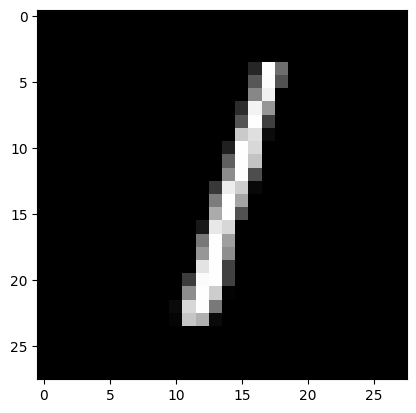

In [51]:
plt.figure()
plt.imshow(X_test[2].reshape(28,28), cmap='gray', interpolation='none')